In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [3]:
df=pd.read_csv('/Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
print("\nMissing values check:")
print(df.isnull().sum())


Missing values check:
price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


In [5]:
print("\n--- Preprocessing Complete ---")


--- Preprocessing Complete ---


In [7]:
X = pd.DataFrame(np.random.rand(100, 3), columns=['FeatureA', 'FeatureB', 'FeatureC'])
y = X['FeatureA'] * 5 + X['FeatureB'] * 2 - X['FeatureC'] * 1 + 10 + np.random.normal(0, 0.5, 100)
feature_names = X.columns
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
print(f"\nTraining set size (X_train, y_train): {X_train.shape}, {y_train.shape}")
print(f"Test set size (X_test, y_test): {X_test.shape}, {y_test.shape}")
print("\n--- Data Split Complete ---")


Training set size (X_train, y_train): (80, 3), (80,)
Test set size (X_test, y_test): (20, 3), (20,)

--- Data Split Complete ---


In [9]:
model = LinearRegression()

In [10]:
model.fit(X_train, y_train)

LinearRegression()

In [11]:
y_pred = model.predict(X_test)

In [12]:
print("\n--- Model Fitting Complete ---")


--- Model Fitting Complete ---


In [13]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [14]:
print("\n--- Model Evaluation ---")
print(f"Mean Absolute Error (MAE): ${mae:.2f}")
print(f"Mean Squared Error (MSE): ${mse:.2f}")
print(f"R-squared (R²): ${r2:.4f}")
print("\n--- Evaluation Complete ---")


--- Model Evaluation ---
Mean Absolute Error (MAE): $0.39
Mean Squared Error (MSE): $0.25
R-squared (R²): $0.8468

--- Evaluation Complete ---


In [15]:
print("\n--- Coefficient Interpretation ---")
print(f"Model Intercept: ${model.intercept_:.2f}")
print("\nFeature Coefficients:")


--- Coefficient Interpretation ---
Model Intercept: $9.85

Feature Coefficients:


In [16]:
coefficients = pd.Series(model.coef_, index=feature_names)
print(coefficients.sort_values(ascending=False).to_string())

print("\nInterpretation Example:")

FeatureA    5.115342
FeatureB    2.185889
FeatureC   -1.093693

Interpretation Example:


In [17]:
first_feature = coefficients.index[0]
first_coeff = coefficients.iloc[0]

print(f"\n- A positive coefficient for a feature like '{first_feature}' (Coefficient: ${first_coeff:.4f}$) means that, holding all other features constant, a one-unit increase in '{first_feature}' is associated with a ${abs(first_coeff):.4f}$ change (increase/decrease) in the predicted target variable (Median House Value).")


- A positive coefficient for a feature like 'FeatureA' (Coefficient: $5.1153$) means that, holding all other features constant, a one-unit increase in 'FeatureA' is associated with a $5.1153$ change (increase/decrease) in the predicted target variable (Median House Value).


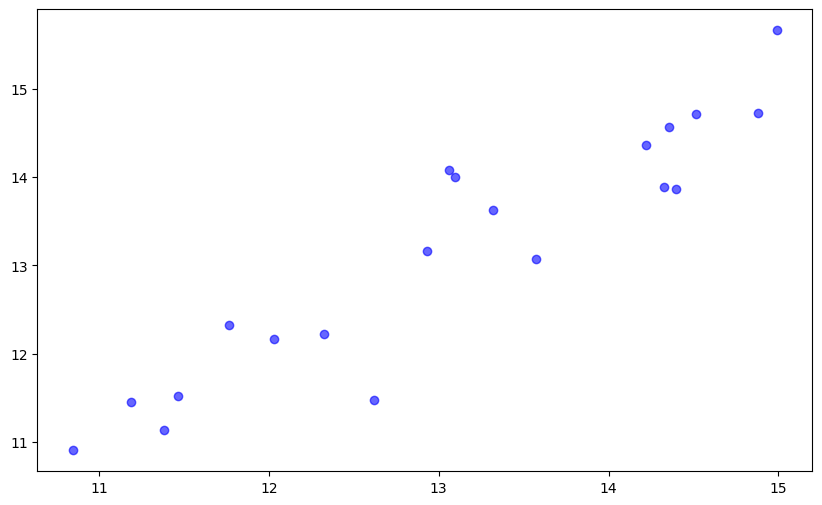

In [18]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)

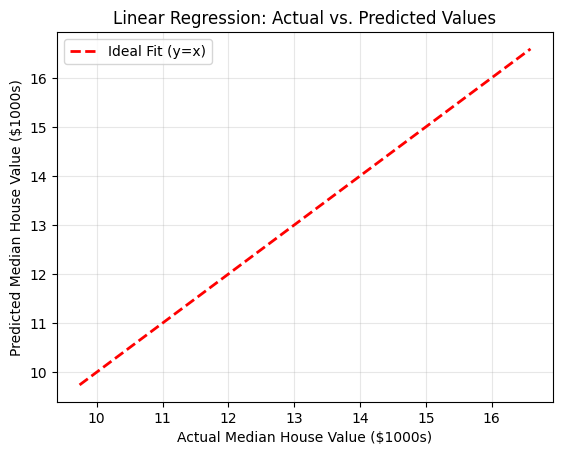

In [19]:
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--', linewidth=2, label='Ideal Fit (y=x)')
plt.title('Linear Regression: Actual vs. Predicted Values')
plt.xlabel('Actual Median House Value ($1000s)')
plt.ylabel('Predicted Median House Value ($1000s)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [20]:
print("\n--- Script Execution Complete ---")


--- Script Execution Complete ---
